In [37]:
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
df = df.drop(["Resume_html", "ID"], axis = 1)
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [5]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    # stemming

    return ' '.join(txt)

df['Resume_str'] = df['Resume_str'].apply(lambda w: preprocess(w))

df.head()

,Resume_str,Category
0,hr administrator marketing associate hr admini...,HR
1,hr specialist us hr operations summary versati...,HR
2,hr director summary years experience recruitin...,HR
3,hr specialist summary dedicated driven dynamic...,HR
4,hr manager skill highlights hr skills hr depar...,HR


In [25]:
test = df.loc[0, "Resume_str"]
test = test.split(" ")

In [30]:
nytest = {}
for value in test:
    if value in nytest.keys():
        nytest[value] += 1
    else:
        nytest[value] = 1

In [53]:
import string
from nltk.corpus import stopwords
#oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
oneSetOfStopWords = stopwords.words('english')
totalWords =[]
Sentences = df['Resume_str'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('state', 16159), ('company', 15212), ('city', 15077), ('management', 12174), ('name', 11739), ('sales', 8275), ('customer', 7927), ('business', 7866), ('skills', 7729), ('new', 6409), ('service', 6223), ('team', 6073), ('development', 5731), ('training', 5637), ('experience', 5632), ('project', 5362), ('work', 4817), ('manager', 4534), ('information', 4502), ('marketing', 4489), ('financial', 4227), ('office', 4189), ('support', 4123), ('education', 4093), ('including', 4045), ('staff', 3950), ('professional', 3857), ('data', 3797), ('system', 3697), ('systems', 3559), ('university', 3477), ('managed', 3432), ('process', 3428), ('customers', 3418), ('design', 3384), ('quality', 3367), ('client', 3272), ('clients', 3244), ('developed', 3228), ('reports', 3090), ('analysis', 3052), ('operations', 3008), ('product', 2951), ('high', 2950), ('program', 2934), ('services', 2847), ('ounting', 2843), ('microsoft', 2830), ('current', 2787), ('ounts', 2782)]


In [61]:
wc = WordCloud(width = 2048, height = 1024, colormap = "inferno").generate(cleanedSentences)


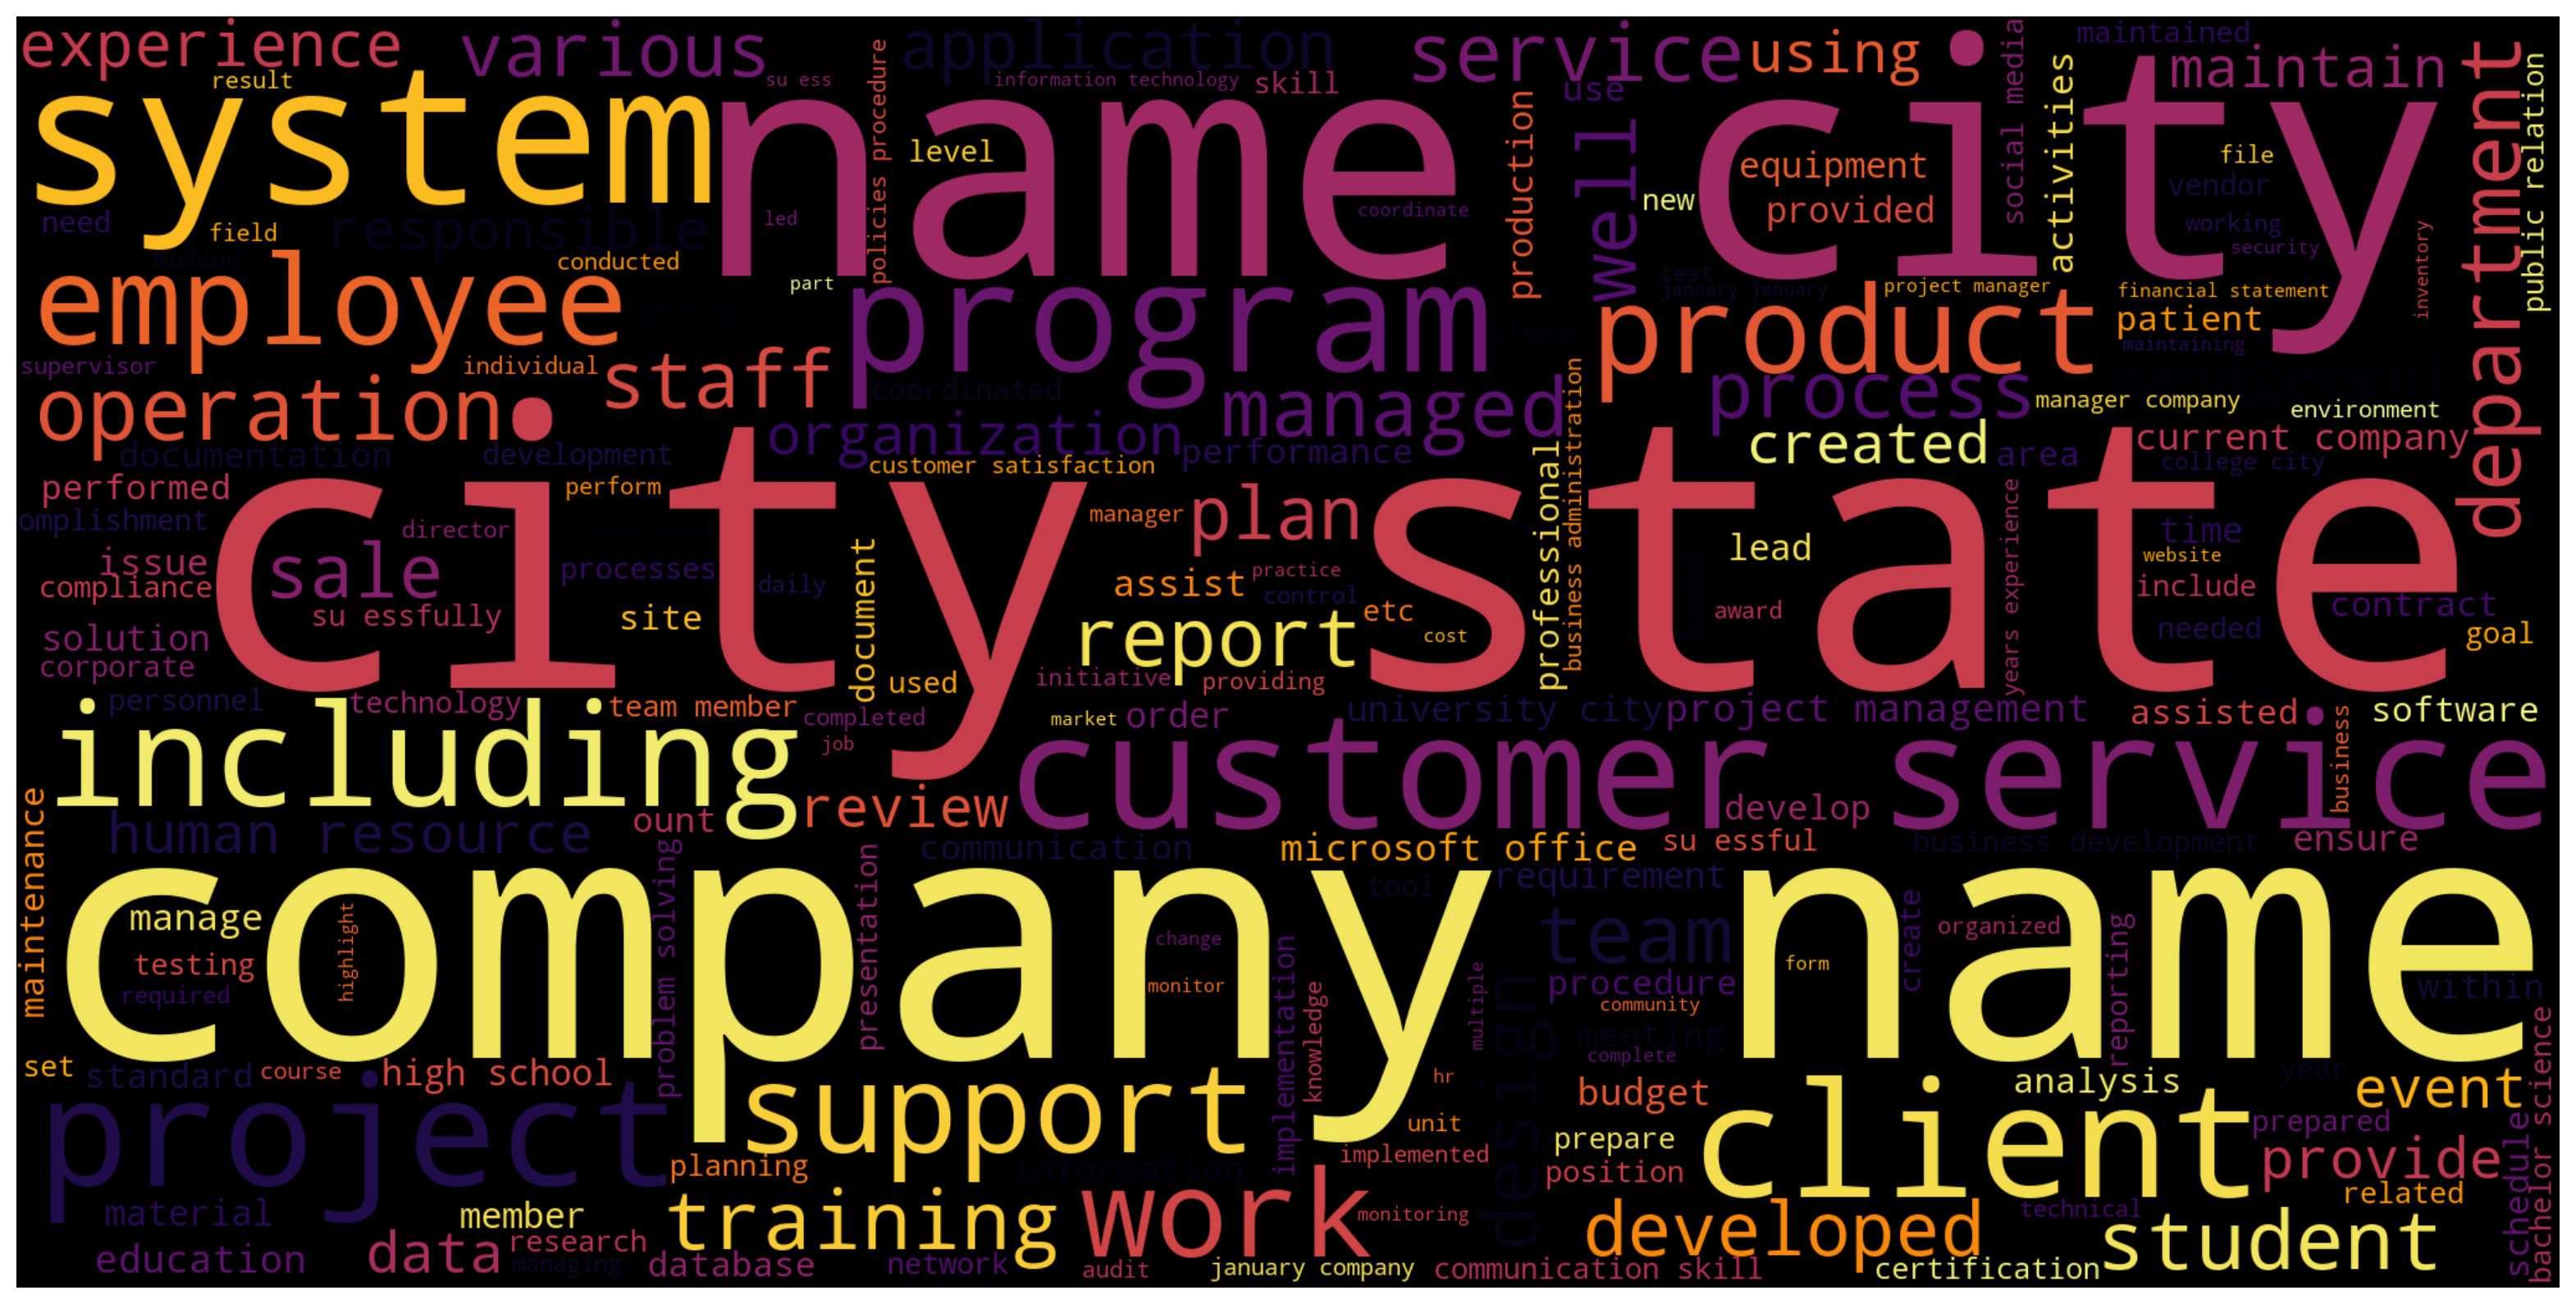

In [62]:
plt.figure(figsize=(20, 20), dpi = 200)
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [68]:
categories = df['Category'].sort_values().unique()
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [72]:
df["Category"] = df["Category"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Resume_str  2484 non-null   object  
 1   Category    2484 non-null   category
dtypes: category(1), object(1)
memory usage: 22.7+ KB


<AxesSubplot:>

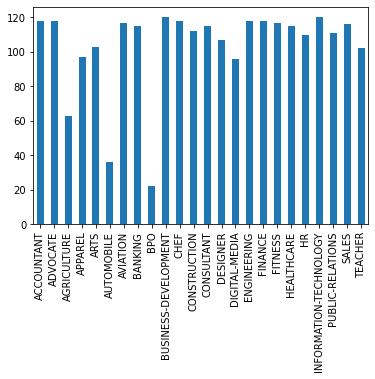

In [88]:
df["Category"].value_counts().sort_index().plot(kind='bar')

In [92]:
from sklearn.utils import shuffle

features = df['Resume_str'].values
original_labels = df['Category'].values
labels = original_labels[:]

for i in range(len(df)):
    
    #labels[i] = str(labels[i].lower())  # convert to lowercase
    labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens
    
features, labels = shuffle(features, labels)

# Print example feature and label
features.shape, labels.shape

((2484,), (2484,))

In [93]:
labels

['CONSULTANT', 'DESIGNER', 'SALES', 'FINANCE', 'HR', ..., 'ARTS', 'CONSULTANT', 'BANKING', 'HR', 'HR']
Length: 2484
Categories (24, object): ['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', ..., 'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER']